## Mini Project - Prediksi Harga Bakso yang Non Linear

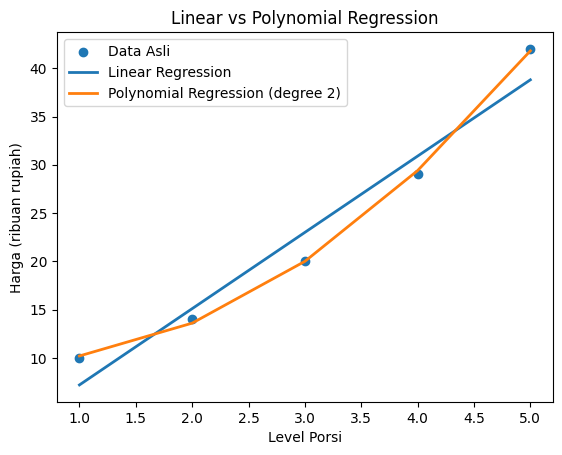

Prediksi harga porsi level 6: [57.2]


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1, 1)   # level porsi
y = np.array([10, 14, 20, 29, 42])         # harga ribuan rupiah

# ----------------------------
# COBA LINEAR REGRESSION DULU
# ----------------------------
# latih model
model_linear = LinearRegression()
model_linear.fit(X, y)

# prediksi
y_lin_pred = model_linear.predict(X)

# ----------------------------
# COBA POLYNOMIAL REGRESSION 
# ----------------------------
from sklearn.preprocessing import PolynomialFeatures

# buat polynomial feature
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# latih model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# prediksi
y_poly_pred = poly_model.predict(X_poly)

# visualisasi
import matplotlib.pyplot as plt

plt.scatter(X, y, label="Data Asli")
plt.plot(X, y_lin_pred, label="Linear Regression", linewidth=2)
plt.plot(X, y_poly_pred, label="Polynomial Regression (degree 2)", linewidth=2)

plt.xlabel("Level Porsi")
plt.ylabel("Harga (ribuan rupiah)")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# prediksi data baru
porsi_baru = np.array([[6]])
porsi_baru_poly = poly.transform(porsi_baru)
prediksi = poly_model.predict(porsi_baru_poly)

print("Prediksi harga porsi level 6:", prediksi)

## Mini Project -

LINEAR REGRESSION
MSE - Linear :  0.7091157771765548
R2 - Linear :  0.45885918903846656

POLYNOMIAL FEATURES
MSE - Linear :  0.6982964744960334
R2 - Linear :  0.4671156210838615


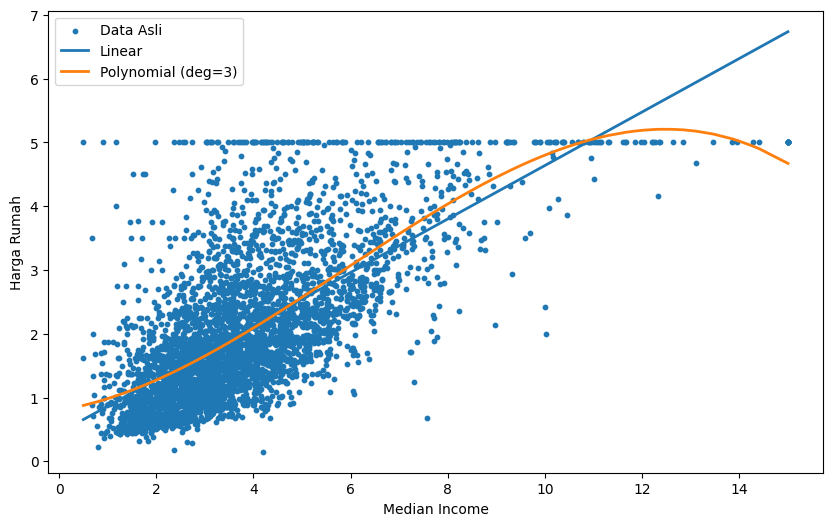

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# load data
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

df.head()

# pilih fitur untuk dijadikan Polynomial
x = df[['MedInc']]
y = df['target']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=(42))

# ========================
# MODEL LINEAR REGRESSION
# ========================
# latih model
model_lin = LinearRegression()
model_lin.fit(x_train, y_train)

# prediksi
y_lin_pred = model_lin.predict(x_test)

# evaluasi model
mse_lin = mean_squared_error(y_test, y_lin_pred)
r2_lin = r2_score(y_test, y_lin_pred)

print("==================================")
print("LINEAR REGRESSION")
print("==================================")
print("MSE - Linear : ", mse_lin)
print("R2 - Linear : ", r2_lin)
print("==================================")

# ====================
# POLYNOMIAL FEATURES
# ====================
# ubah fitur menjadi polynomial
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# latih model
model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)

# prediksi
y_poly_pred = model_poly.predict(x_test_poly)

# evaluasi model
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
print("\n==================================")
print("POLYNOMIAL FEATURES")
print("==================================")
print("MSE - Linear : ", mse_poly)
print("R2 - Linear : ", r2_poly)
print("==================================")

# visualisasi 
# Sort X for nice curve
sort_idx = np.argsort(x_test.values.flatten())
X_plot = x_test.values.flatten()[sort_idx]
y_linear_plot = y_lin_pred[sort_idx]
y_poly_plot = y_poly_pred[sort_idx]

plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, s=10, label="Data Asli")
plt.plot(X_plot, y_linear_plot, label="Linear", linewidth=2)
plt.plot(X_plot, y_poly_plot, label="Polynomial (deg=3)", linewidth=2)
plt.xlabel("Median Income")
plt.ylabel("Harga Rumah")
plt.legend()
plt.show()

## MINI PROJECT ADVANCE 2 — Polynomial Regression + Feature Engineering + Interpretasi Model

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# load data
import seaborn as sns
df = sns.load_dataset("mpg")

# hapus nilai yang kosong
df = df.dropna()
df.head()

# target : konsumsi bensin mobil

# pilih fitur
x = df[['horsepower', 'weight', 'acceleration']]
y = df['mpg']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ========================
# MODEL LINEAR REGRESSION
# ========================
# latih model
model_lin = LinearRegression()
model_lin.fit(x_train, y_train)

# prediksi
y_lin_pred = model_lin.predict(x_test)

# evaluasi model
mse_lin = mean_squared_error(y_lin_pred, y_test)
r2_lin = r2_score(y_lin_pred, y_test)
print("==================================")
print("LINEAR REGRESSION")
print("==================================")
print("MSE - Linear : ", mse_lin)
print("R2 - Linear : ", r2_lin)
print("==================================")

# ====================
# POLYNOMIAL FEATURES
# ====================
# ubah fitur menjadi polynomial
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# latih model
model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train)

# prediksi 
y_poly_pred = model_poly.predict(x_test_poly)

# evaluasi model 
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)
print("\n==================================")
print("POLYNOMIAL FEATURES")
print("==================================")
print("MSE - Linear : ", mse_poly)
print("R2 - Linear : ", r2_poly)
print("==================================")

# lihat fitur baru yang dibuat polynomial
poly.get_feature_names_out(x.columns)

# interpretasi koefisien model polynomial
coeffs = pd.DataFrame({
       "feature" : poly.get_feature_names_out(x.columns),
       "coef" : model_poly.coef_
})

coeffs.sort_values("coef", ascending=False)

# cek overfitting sederhana
y_train_pred_poly = model_poly.predict(x_train_poly)
mse_train = mean_squared_error(y_train, y_train_pred_poly)
mse_train, mse_poly

LINEAR REGRESSION
MSE - Linear :  17.812815015465578
R2 - Linear :  0.6429903899305813

POLYNOMIAL FEATURES
MSE - Linear :  15.846297046184821
R2 - Linear :  0.6895353453992661


(14.64520010397657, 15.846297046184821)

## Mini Project Advance: Polynomial Regression + Regularization (Ridge & Lasso)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

df = sns.load_dataset("mpg").dropna()
df.head()

# menentukan fitur dan target
x = df[['horsepower', 'weight', 'acceleration']]
y = df['mpg']

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# polynomial feature degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

# latih model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# prediksi 
y_poly_pred = model.predict(x_test_poly)
y_poly_train_pred = model.predict(x_train_poly)

# evaluasi model
mse = mean_squared_error(y_test, y_poly_pred)
mse_train_lin = mean_squared_error(y_train, y_poly_train_pred)
r2 = r2_score(y_test, y_poly_pred)

print("Linear Polynomial MSE Train :", mse_train_lin)
print("Linear Polynomial MSE Test  :", mse)

# train model ridge (R2)
model_ridge = Ridge(alpha=1)
model_ridge.fit(x_train_poly, y_train)

# prediksi
y_pred_test_ridge = model_ridge.predict(x_test_poly)
y_pred_train_ridge = model_ridge.predict(x_train_poly)

# evaluasi model
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)

print("\nRidge MSE Train :", mse_train_ridge)
print("Ridge MSE Test  :", mse_test_ridge)

# train model lasso (L1)
model_lasso = Lasso(alpha=0.1, max_iter=10000)
model_lasso.fit(x_train_poly, y_train)

y_pred_test_lasso = model_lasso.predict(x_test_poly)
y_pred_train_lasso = model_lasso.predict(x_train_poly)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)

print("\nLasso MSE Train :", mse_train_lasso)
print("Lasso MSE Test  :", mse_test_lasso)

# membandingkan semua model
print("\n=== MSE TEST ===")
print("Linear Polynomial :", mse)
print("Ridge            :", mse_test_ridge)
print("Lasso            :", mse_test_lasso)

print("\n=== MSE TRAIN ===")
print("Linear Polynomial :", mse_train_lin)
print("Ridge            :", mse_train_ridge)
print("Lasso            :", mse_train_lasso)


# melihat koefisian model
# lihat fitur polynomial
features = poly.get_feature_names_out(x.columns)
coef_df = pd.DataFrame({
    "feature": features,
    "Linear": model.coef_,
    "Ridge": model_ridge.coef_,
    "Lasso": model_lasso.coef_,
})

coef_df.head(15)

# cek fitur yang dihapus lasso
np.sum(model_lasso.coef_ == 0)

Linear Polynomial MSE Train : 14.027815914259339
Linear Polynomial MSE Test  : 18.777426385584675

Ridge MSE Train : 14.19386107403102
Ridge MSE Test  : 16.6915503261743

Lasso MSE Train : 14.325550119452211
Lasso MSE Test  : 15.941498125017299

=== MSE TEST ===
Linear Polynomial : 18.777426385584675
Ridge            : 16.6915503261743
Lasso            : 15.941498125017299

=== MSE TRAIN ===
Linear Polynomial : 14.027815914259339
Ridge            : 14.19386107403102
Lasso            : 14.325550119452211


C:\Users\aulia\AppData\Roaming\Python\Python313\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.70393e-24): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
C:\Users\aulia\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.244e+03, tolerance: 1.975e+00
  model = cd_fast.enet_coordinate_descent(


np.int64(1)